In [3]:
from dbconnector import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%gui


In [4]:
dbconfig = get_configuration()
connection = make_connection(dbconfig)
q_coupons = "SELECT distinct \
t1.user_id, \
t1.item_name, \
t1.item_price, \
case when length(t2.coupon_code)>0 then 1 else 0 end as coupon_bool, \
t1.dealer, \
t1.action_type, \
t1.time_stamp, \
CONCAT(year(t1.time_stamp),'Q',quarter(t1.time_stamp)) as timeperiod, \
t1.item_registration_id \
FROM datasci.actions as t1 \
Inner join datasci.devices as t2 on t1.user_id = t2.user_id \
where item_name like 'Status%' \
order by time_stamp;"

coupons = query_db(connection,q_coupons)

In [2]:
coupon_mean = coupons.groupby('timeperiod')['coupon_bool'].mean()

NameError: name 'coupons' is not defined

In [76]:
coupon_frequency = coupons.groupby('timeperiod')['coupon_bool'].sum()

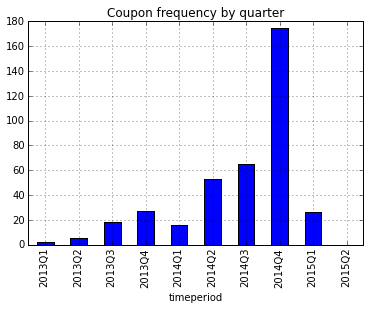

In [78]:
coupon_frequency.plot(kind = 'bar',title='Coupon frequency by quarter')

In [1]:
coupon_mean.plot(title='Mean coupon use by quarter',xticks=plt.locator_params(nbins = 8))

NameError: name 'coupon_mean' is not defined